# Data Analysis

### 1) Importing and Processing the Data

<p>Our dataset, collected via FRED website, is a time series data tracking the Georgia Housing index from 2000 to 2019.</p>
<p>The <strong>dependent variable</strong> of the study is the Housing Index, where we investigate what factors may play a bigger role in affecting the change of the index.</p>
<p>The <strong>independent of the study</strong> includes:</p>
<ol>
<li>New Private Housing Units - The number of new private housing established<br>(measures the average price changes for homes that are sold or refinanced)</li>
<li>Median Household Income - The median household income in Georgia</li>
<li>Unemployment Rate - The unemployment rate in Georgia</li>
<li>All employee, Social Assistance - The number of employee hired in Social Assistance sector <strong>in thousand of person</strong><br> (As an indicator to measure the growth of the Social Assistance sector in GA)</li>
<li>All employee, Education, Health Service - The number of employee hired in Education and Health sector <strong>in thousand of person</strong><br>(As an indicator to measure the growth of the Education, Health Service sector in GA)</li>
</ol>


In [3]:
# import the necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# import data 
house = pd.read_csv('GA house_new.csv')

house.head(5).round(3)

,DATE,Housing Index,New Private Housing Units,Unemployment rate,"All employee, Social Assistance","All Employee, Education, Health Service",Median Household Income
0,2000-01-01,229.98,7993.215,3.633,309.833,345.900,41901
1,2000-04-01,233.73,7696.030,3.700,311.733,348.767,41901
2,2000-07-01,237.51,7486.818,3.600,312.800,352.267,41901
3,2000-10-01,241.40,7551.964,3.400,315.433,354.533,41901
4,2001-01-01,248.19,7833.710,3.567,315.867,358.000,42576


#### Desprictive Analysis

After having an clear idea of what the dataset is about. Next, it is necessary to have a look at a statistical summary of our dataset.

In [4]:
house.describe().round(3)

,Housing Index,New Private Housing Units,Unemployment rate,"All employee, Social Assistance","All Employee, Education, Health Service",Median Household Income
count,80.000,80.000,80.000,80.000,80.000,80.000
mean,295.154,4924.321,6.082,408.727,474.074,47690.150
std,37.565,2654.502,2.280,60.762,76.497,5021.495
min,229.980,1222.641,3.133,309.833,345.900,40984.000
25%,265.507,2802.340,4.475,359.158,411.492,43239.750
50%,290.180,4246.093,5.150,403.367,469.367,46609.500
75%,319.662,7700.416,7.708,456.242,533.050,49858.250
max,389.630,9752.292,10.600,527.133,621.567,57985.000


The average value for the Georgia Housing Index was estimated at 295.154 with a standard deviation of 37.565. The lowest index was 229.98 which was recorded in 2000Q1 and was ascribed to the early 2000 recession along with the multiple downfalls of tech giants.The maximum was 389.63, a record high, in 2019Q4 which was considered one of the most prosperour period in 2010S. 

### Data Visualization

Before conducting any regression analysis, let's first inpect the data set to a further extent!
With the housing index as the dependent variable, we have to find some linear relationships with our regressors by implementing scatter plots. These variables are further used for building our regression models. For statistical visualizations, we used seaborn and matplotlib as the main workhorse. 

<strong>Housing Index vs. Median Household Income<strong>

Text(0.96, 0.5, 'Household Income')

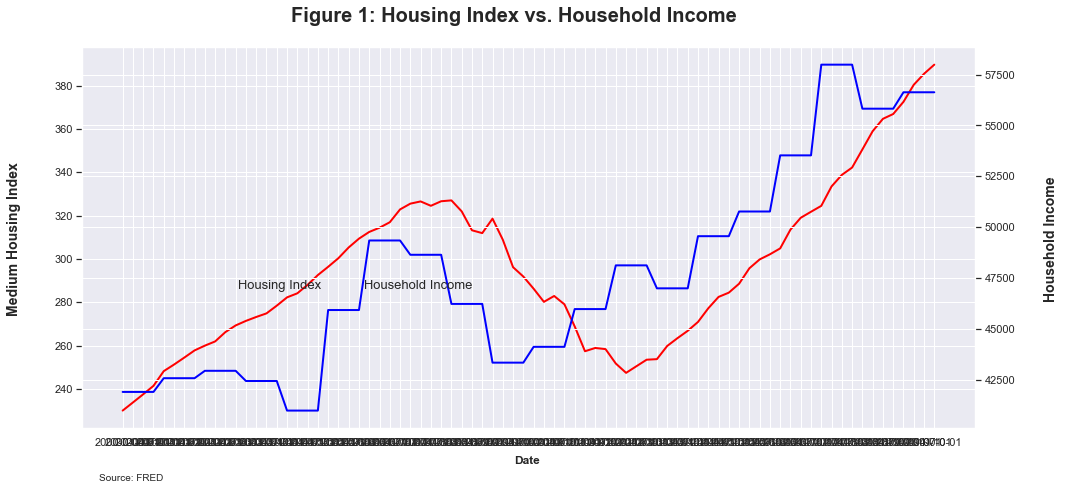

In [32]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (16, 7))
ax.plot(house.DATE, house['Housing Index'], linewidth = 2, c = 'red')

fig.text(0.06, 0.5, "Medium Housing Index", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')
fig.text(0.50, 0.06, 'Date', va = 'center', weight = 'bold', fontsize = 12)
fig.suptitle("Figure 1: Housing Index vs. Household Income", weight = 'bold', fontsize = 20, y = 0.96) 
fig.text(0.14, 0.02, 'Source: FRED', fontsize = 10, weight = 'normal')

fig.text(0.26, 0.40, "Housing Index",  weight = 'normal', fontsize = 13) 
fig.text(0.37, 0.40, "Household Income",  weight = 'normal', fontsize = 13) 

ax2= ax.twinx()
ax2.plot(house.DATE, house['Median Household Income'], linewidth = 2, c = 'blue')
fig.text(0.96, 0.5, "Household Income", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')

Since personal assetthe is a major factor that influence us whether to own a house or not, We suspect that there might be a strong correlation between the median household income and the housing index.

The graph shows that there is indeed a similar positive trend between these two variables. One interesting fact that is worth notice is that before the intersection in 2010, there is a period of time where the housing index continues to rise depite the lowlevel household income, suggesting that people might purchase houses in a irrational level that exceeds their budget during that time. 

<strong> Housing Index vs. Unemployment

Text(0.96, 0.5, 'Unemployment rate %')

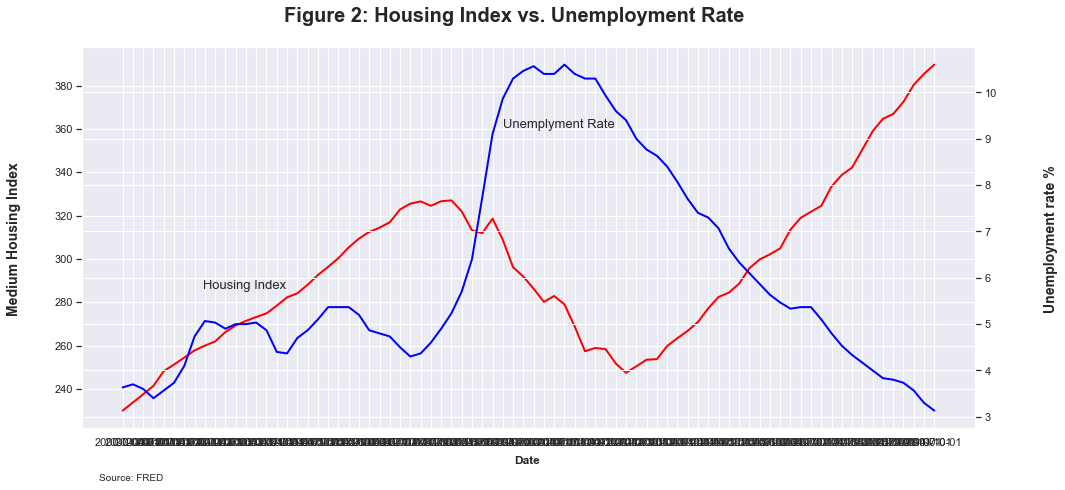

In [31]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (16, 7))
ax.plot(house.DATE, house['Housing Index'], linewidth = 2, c = 'red')

fig.text(0.06, 0.5, "Medium Housing Index", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')
fig.text(0.50, 0.06, 'Date', va = 'center', weight = 'bold', fontsize = 12)
fig.suptitle("Figure 2: Housing Index vs. Unemployment Rate", weight = 'bold', fontsize = 20, y = 0.96) 
fig.text(0.14, 0.02, 'Source: FRED', fontsize = 10, weight = 'normal')

fig.text(0.23, 0.40, "Housing Index",  weight = 'normal', fontsize = 13) 
fig.text(0.49, 0.72, "Unemplyment Rate",  weight = 'normal', fontsize = 13) 

ax2= ax.twinx()
ax2.plot(house.DATE, house['Unemployment rate'], linewidth = 2, c = 'blue')
fig.text(0.96, 0.5, "Unemployment rate %", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')

The trend between the housing index and the unemployment rate is an obvious one. The correlation between the two is seemingly a negative one showing the incease of Housing Index along with the decrease of Unemployment rate.

<Strong>Housing Index vs. Private Housing(new established)

Text(0.96, 0.5, 'New Private Housing Units')

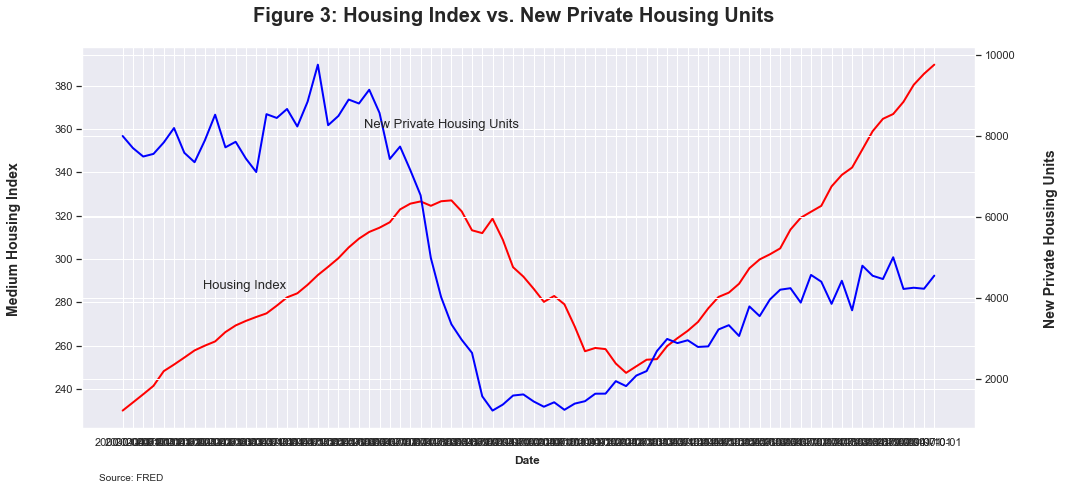

In [30]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (16, 7))
ax.plot(house.DATE, house['Housing Index'], linewidth = 2, c = 'red')

fig.text(0.06, 0.5, "Medium Housing Index", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')
fig.text(0.50, 0.06, 'Date', va = 'center', weight = 'bold', fontsize = 12)
fig.suptitle("Figure 3: Housing Index vs. New Private Housing Units", weight = 'bold', fontsize = 20, y = 0.96) 
fig.text(0.14, 0.02, 'Source: FRED', fontsize = 10, weight = 'normal')

fig.text(0.23, 0.40, "Housing Index",  weight = 'normal', fontsize = 13) 
fig.text(0.37, 0.72, "New Private Housing Units",  weight = 'normal', fontsize = 13) 

ax2= ax.twinx()
ax2.plot(house.DATE, house['New Private Housing Units'], linewidth = 2, c = 'blue')
fig.text(0.96, 0.5, "New Private Housing Units", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')

We suspected that there is a positive relation between the housing index and the new establish housing units, since the spike of the new established pirve houses often signals prosperity of the housing market. Judging the trend of housing index versus pricate housing units, the correlation between the two seems to be positive, especially during the 2008, the crash of the housing bubbles.

<Strong>Housing Index vs. All employee, Social Assistance & education, health 

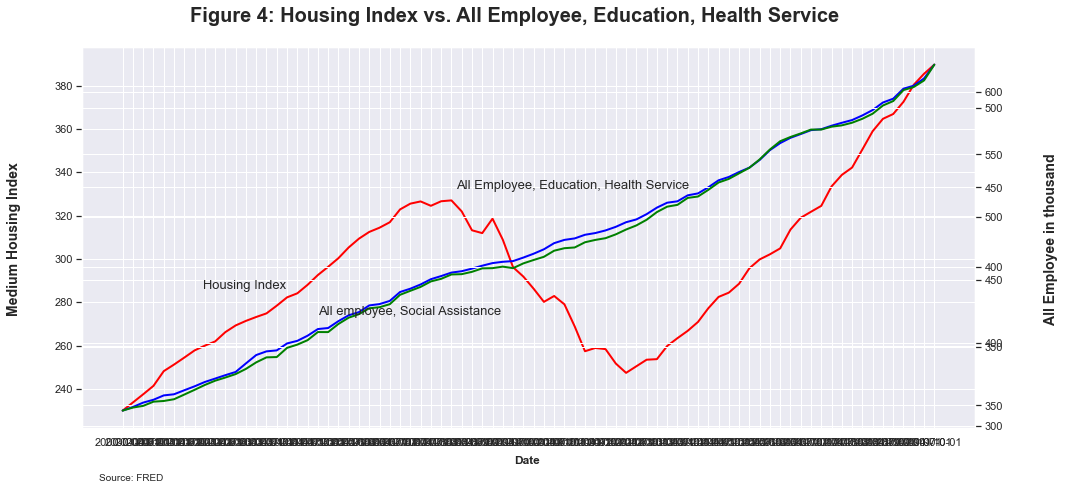

In [53]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (16, 7))
ax.plot(house.DATE, house['Housing Index'], linewidth = 2, c = 'red')

fig.text(0.06, 0.5, "Medium Housing Index", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')
fig.text(0.50, 0.06, 'Date', va = 'center', weight = 'bold', fontsize = 12)
fig.suptitle("Figure 4: Housing Index vs. All Employee, Education, Health Service", weight = 'bold', fontsize = 20, y = 0.96) 
fig.text(0.14, 0.02, 'Source: FRED', fontsize = 10, weight = 'normal')

fig.text(0.23, 0.40, "Housing Index",  weight = 'normal', fontsize = 13) 
fig.text(0.45, 0.60, "All Employee, Education, Health Service",  weight = 'normal', fontsize = 13)
fig.text(0.33, 0.35, "All employee, Social Assistance",  weight = 'normal', fontsize = 13)

ax2= ax.twinx()
ax2.plot(house.DATE, house['All Employee, Education, Health Service'], linewidth = 2, c = 'blue')
fig.text(0.96, 0.5, "All Employee in thousand", va = 'center', weight = 'bold', fontsize = 14, rotation = 'vertical')

ax3= ax.twinx()
ax3.plot(house.DATE, house['All employee, Social Assistance '], linewidth = 2, c = 'green')

There is no significatn correlation between the number of employee hired in public service sectors with the housing index. The linear positive trend of the people working in public service sectors and it is influenced little by the fluctuation of the housing index. 